# **CSE655 Homework 1**

### **Part 1: Training a deep feed forward network for multidimensional regression.**




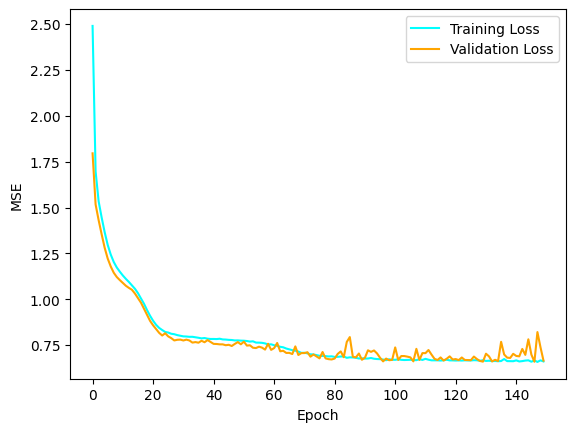

In [25]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

def function(x):
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    y1 = x1 * x3 + 1.2 * x1 * x5 - x6 * x7 * x8 - 2 * x1**2 * x8 + x5
    y2 = x1 * x5 * x6 - x3 * x4 - 3 * x2 * x3 + 2 * x2**2 * x4 - 2 * x7 * x8 - 1
    y3 = 2 * x3**2 - x5 * x7 - 3 * x1 * x4 * x6 - x1**2 * x2 * x4 - 1
    y4 = -x6**3 + 2 * x1 * x3 * x8 - x1 * x4 * x7 - 2 * x5**2 * x2 * x4 - x8
    y5 = x1**2 * x5 - 3 * x3 * x4 * x8 + x1 * x2 * x4 - 3 * x6 - x1**2 * x7 + 2
    y6 = x1**2 * x3 * x6 - x3 * x5 * x7 + x3 * x4 + 2.2 * x4 + x2**2 * x3 - 2.1
    return [y1, y2, y3, y4, y5, y6]

Nt = 1000
Nv = 1000

np.random.seed(0)
xdata = np.random.uniform(-1, 1, (2000, 8))
ydata = np.array([function(x) for x in xdata])

xt, yt = xdata[:1000], ydata[:1000]
xv, yv = xdata[1000:], ydata[1000:]

noise = np.random.normal(0, 0.001, yt.shape)
yt = yt + noise

# noise = np.random.normal(0, 0.001, yv.shape)
# yv = yv + noise

model = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(8,)),
    layers.Dense(6, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(6, activation='linear')
])

# Compile
model.compile(optimizer=SGD(learning_rate=0.05), loss='mse')

history = model.fit(
    xt, yt,
    epochs = 150,
    validation_data = (xv, yv),
    verbose = 0
)

plt.plot(history.history['loss'], label='Training Loss', color='cyan')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


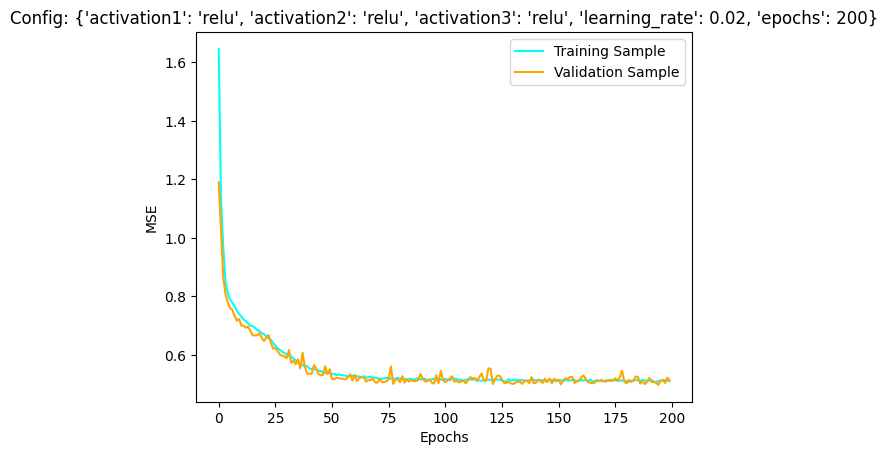

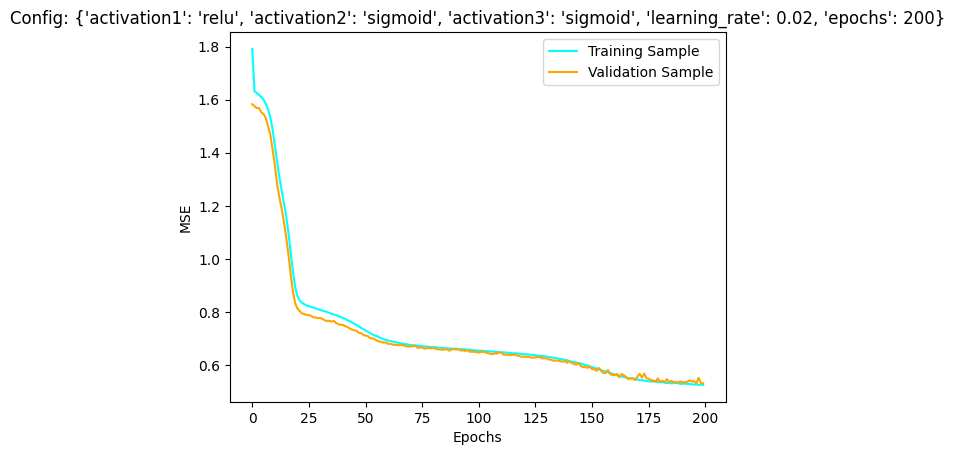

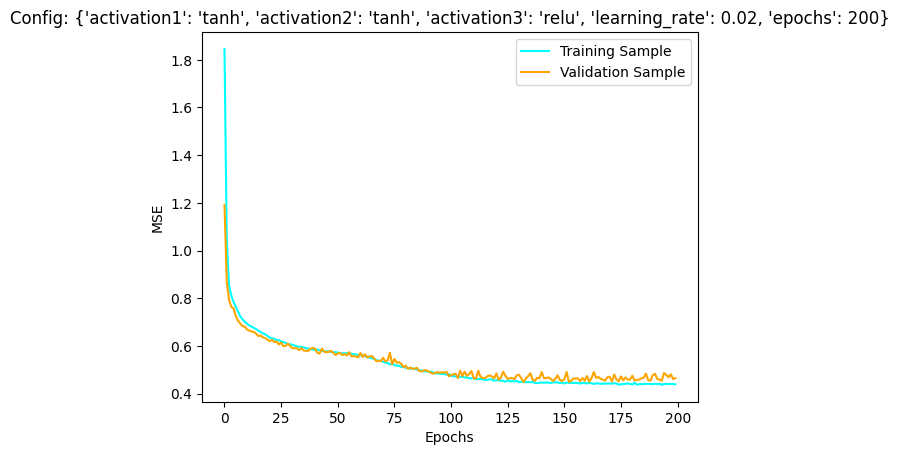

Best configuration: {'activation1': 'tanh', 'activation2': 'tanh', 'activation3': 'relu', 'learning_rate': 0.02, 'epochs': 200}
Validation MSE for best config: 0.4647919237613678


In [27]:
# Different configurations
configs = [
    {"activation1": "relu", "activation2": "relu", "activation3": "relu", "learning_rate": 0.02, "epochs": 200},
    {"activation1": "relu", "activation2": "sigmoid", "activation3": "sigmoid", "learning_rate": 0.02, "epochs": 200},
    {"activation1": "tanh", "activation2": "tanh", "activation3": "relu", "learning_rate": 0.02, "epochs": 200},
]

# Store results to find the best parameters
results = []

for config in configs:
    model = models.Sequential()
    model.add(layers.Dense(6, input_shape=(8,), activation=config["activation1"]))
    model.add(layers.Dense(6, activation=config["activation2"]))
    model.add(layers.Dense(6, activation=config["activation3"]))
    model.add(layers.Dense(6, activation='linear'))  # Output layer

    sgd = SGD(learning_rate=config["learning_rate"])
    model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

    # Train the model
    history = model.fit(
        np.array(xt),
        np.array(yt),
        validation_data=(np.array(xv), np.array(yv)),
        epochs=config["epochs"],
        batch_size=4,
        verbose = 0
    )

    # Store configuration and final validation error
    valMse = history.history['val_mse'][-1]
    results.append({"config": config, "val_mse": valMse})

    # Plotting results for each configuration
    plt.plot(history.history['mse'], label='Training Sample', color='cyan')
    plt.plot(history.history['val_mse'], label='Validation Sample', color='orange')
    plt.title(f"Config: {config}")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Step 7: Choose the best parameters
best_config = min(results, key=lambda x: x["val_mse"])
print("Best configuration:", best_config["config"])
print("Validation MSE for best config:", best_config["val_mse"])


Iteration :  0  Nodes :  6   6   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032 - mse: 0.4032
Iteration :  0  val mse :  0.41428476572036743
Iteration :  1  Nodes :  18   6   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2347 - mse: 0.2347 
Iteration :  1  val mse :  0.2413768321275711
Iteration :  2  Nodes :  18   18   6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1416 - mse: 0.1416 
Iteration :  2  val mse :  0.1424660086631775
Iteration :  3  Nodes :  18   18   18
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1078 - mse: 0.1078 
Iteration :  3  val mse :  0.11225558817386627
Iteration :  4  Nodes :  30   18   18
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0852 - mse: 0.0852  
Iteration :  4  val mse :  0.08992582559585571
Iteration :  5  Nodes :  30   30   18
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0699 - mse: 0.0699
Iteration :  5  val mse :  0.07274004071950912
Iteration :  6  Nodes :  30   30   30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 

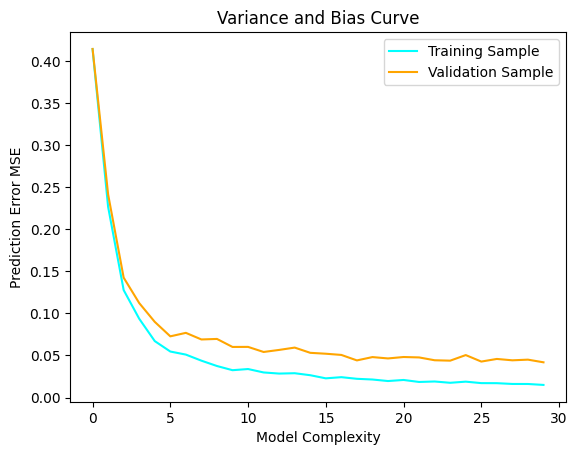

In [28]:
# Settings
learningRate = 0.02
epochs = 200
layerActivation = ['tanh', 'tanh', 'relu']
layerNodes = [6, 6, 6]

# Initialize variables to store results
trainMseList = []
valMseList = []
iteration = 0 
maxIterations = 30 # Total iterations

# Iterate through hidden layers
while iteration < maxIterations:
    for n in range(3):
        print("Iteration : ", iteration, " Nodes : ", layerNodes[0], " ", layerNodes[1], " ", layerNodes[2])

        model = models.Sequential()
        model.add(layers.Dense(layerNodes[0], input_shape=(8,), activation=layerActivation[0]))
        model.add(layers.Dense(layerNodes[1], activation=layerActivation[1]))
        model.add(layers.Dense(layerNodes[2], activation=layerActivation[2]))
        model.add(layers.Dense(6, activation='linear'))  # Output layer
            
        # Compile model with fixed learning rate
        sgd = SGD(learning_rate=learningRate)
        model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
        
        # Train model and capture training/validation MSE
        history = model.fit(
            np.array(xt),
            np.array(yt),
            validation_data=(np.array(xv), np.array(yv)),
            epochs=epochs,  
            batch_size=4,
            verbose=0
        )
        
        # Record the final training and validation MSE
        loss, accuracy = model.evaluate(np.array(xv), np.array(yv))
        trainMseList.append(history.history['mse'][-1])
        valMseList.append(loss)
        
        print("Iteration : ", iteration, " val mse : ", valMseList[iteration])

        layerNodes[n] += 12 # Add nodes to layer
        iteration += 1
        if(iteration >= maxIterations): break

# Plotting results for each configuration
plt.plot(trainMseList, label='Training Sample', color='cyan')
plt.plot(valMseList, label='Validation Sample', color='orange')
plt.title("Variance and Bias Curve")
plt.xlabel('Model Complexity')
plt.ylabel('Prediction Error MSE')
plt.legend()
plt.show()
